In [1]:
import pandas as pd
import csv

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Loading a 'practice' file

In [2]:
FILEPATH = "../files/Object Hit - [Child - practice] - RIGHT - 12_02.csv"
# The first rows don't include tracking data -> skiprows
results = pd.read_csv(FILEPATH,encoding= 'unicode_escape', sep=',',skiprows = 390, parse_dates=[0,1,2])
# Sorted by Frame number
results

,Trial #,TP Row,Block Row,Sample duration (s),Sample count,Event name,Event time (s),Video frame sent,Video frame ACKed,Frame #,...,Left: Shoulder angle,Left: Elbow angle,Left: Shoulder velocity,Left: Elbow velocity,Left: Shoulder acceleration,Left: Elbow acceleration,Left: Cmd shoulder torque,Left: Cmd elbow torque,Video frame interval time,Video frame drop count
0,1,1,1,0.005,3347.0,Continue Task,0.0,NaN,NaN,0,...,0.479841,1.396012,0.009587,-0.009587,9.587379,-19.174759,0.0,0.0,9.000000,0
1,NaN,NaN,NaN,NaN,NaN,Gaze blink start,0.0,Video Frame 0,NaN,1,...,0.479869,1.396003,0.009587,-0.009587,9.587379,-19.174759,0.0,0.0,9.000000,0
2,NaN,NaN,NaN,NaN,NaN,Gaze saccade start,0.0,NaN,NaN,2,...,0.479898,1.395993,0.009587,-0.009587,9.587379,-9.587379,0.0,0.0,9.000000,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Video Frame 1,NaN,3,...,0.479927,1.395993,0.009587,0.000000,9.587379,0.000000,0.0,0.0,9.000000,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Video Frame 2,NaN,4,...,0.479956,1.395983,0.009587,0.000000,9.587379,0.000000,0.0,0.0,9.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Video Frame 2000,3342,...,0.812954,1.162636,-0.191748,0.431432,9.587379,-9.587379,0.0,0.0,7.999420,0
3343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Video Frame 2001,3343,...,0.811976,1.164774,-0.201335,0.431432,-9.587379,9.587379,0.0,0.0,7.999420,0
3344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3344,...,0.811008,1.166874,-0.191748,0.412257,0.000000,-9.587379,0.0,0.0,7.999420,0
3345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Video Frame 2002,3345,...,0.810020,1.168954,-0.201335,0.412257,-9.587379,0.000000,0.0,0.0,9.000778,0


In [3]:
# cols = results.columns
# for i in cols: print(i)

### First plots

In [4]:
gazeX = results['Gaze_X']
gazeY = results['Gaze_Y']

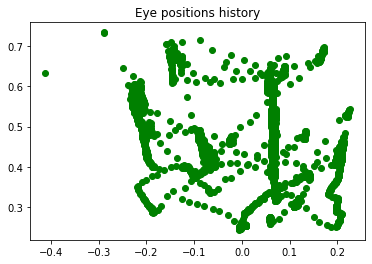

In [5]:
fig = plt.figure()
i = 0
while i < len(gazeX):
    plt.plot(gazeX[i],gazeY[i],'go')
    i+=1
plt.title("Eye positions history")
plt.show()

In [6]:
# Plot don't show up on ipynb but works within a script
# Check 'eye_animation.py'
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

x,y = [], []
fig, ax = plt.subplots()
def animate(i):
    x.append(gazeX[i])
    y.append(gazeY[i])
    print(x)

    ax.clear()
    ax.plot(x, y, 'ro')
    ax.set_xlim([-0.5,0.5])
    ax.set_ylim([0,1])

ani = FuncAnimation(fig, animate, frames=len(gazeX), interval=5, repeat=False)
#plt.show()
plt.close()

### Plot of eyes combined with both hands positions

In [7]:
# Time interval between frames: 5ms
print('Total time of the practice (s):', results['Frame time (s)'].iloc[-1])
#results['Frame time (s)'].iloc[-1] / 0.005

Total time of the practice (s): 16.7299995


In [8]:
time = results['Frame time (s)']
gazeX = results['Gaze_X']
gazeY = results['Gaze_Y']

# Right: Hand speed
rightX = results['Right: Hand position X']
rightY = results['Right: Hand position Y']
rightSpeed = results['Right: Hand speed']
# Left hand
leftX = results['Left: Hand position X']
leftY = results['Left: Hand position Y']
leftSpeed = results['Left: Hand speed']
    

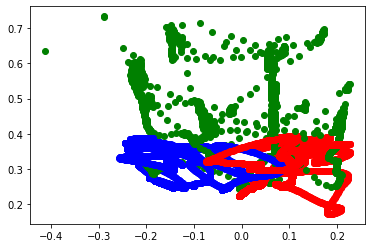

In [9]:
fig = plt.figure()
i = 0
while i < len(gazeX):
    plt.plot(rightX[i],rightY[i],'ro')
    plt.plot(leftX[i],leftY[i],'bo')
    plt.plot(gazeX[i],gazeY[i],'go')
    i+=1
plt.show()

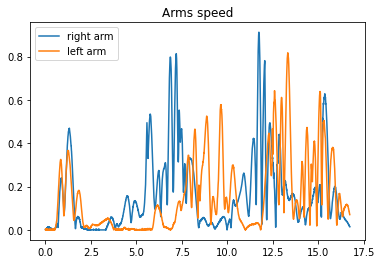

In [10]:
plt.plot(time, rightSpeed, label='right arm')
plt.plot(time, leftSpeed, label='left arm')
plt.title('Arms speed')
plt.legend()
plt.savefig('arms_speed.svg')

## Events

In [11]:
# Relevant columns: 
# Event name
# Event time (s)

# 101 rows register an event
len(results[results['Event name'].notna()])

101

(array([3., 0., 0., ..., 0., 0., 0.]),
 array([0.00000000e+00, 4.99999989e-03, 9.99999978e-03, ...,
        1.67199993e+01, 1.67250004e+01, 1.67299995e+01]),
 [<matplotlib.patches.Polygon at 0x7fa111d972b0>])

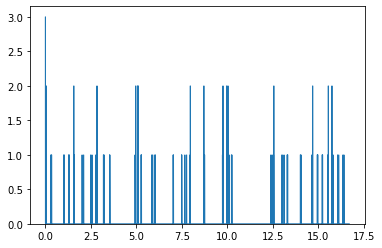

In [12]:
res_events = results[results['Event name'].notna()]
event_times = res_events['Event time (s)']
plt.hist(event_times, results['Frame time (s)'], histtype='step')

## Trials identification and separation

Normal files contain several Trials, the first goal here is to automatically read the csv's of an experience and extract the events separately.

In [13]:
# practice example is from ball_on_bar exercise
practice_ball = "../files/Object Hit - [Child - practice] - RIGHT - 12_02.csv"

ball = "../files/Ball on Bar - Child - RIGHT - 11_59.csv"
circuit = "../files/Circuit_Exo - [b Circuit1 (youngerchildren)] - RIGHT - 12_09.csv"
object_hit = "../files/Object Hit - Child - RIGHT - 12_02.csv"
reaching = "../files/Visually Guided Reaching - Child v2 (4 target) - LEFT - 11_50.csv"


Skipping the lines from a given 

In [14]:
import subprocess
process = subprocess.Popen(["bash", "copy.sh"])

In [15]:
trials = []
ENCODE = 'utf_8'
with open(ball, encoding=ENCODE) as infile:
    for cnt, line in enumerate(infile):
        if "Trial #" in line:
            print("Line {}".format(cnt))
            if ENCODE == 'iso8859':
                trials.append(cnt-33)
            else:
                trials.append(cnt-7)
    print("Line end :", cnt)
    trials.append(cnt)

Line 366
Line 65911
Line 127827
Line end : 130620


In [160]:
dfs = []
for i, j in enumerate(trials[:-1]):
    dfs.append(pd.read_csv('ball_copy.csv',encoding= 'unicode_escape', sep=',',
                            skiprows = j, nrows=trials[i+1]-trials[i]))

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,1,2,3,4,6,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [170]:
for i in dfs:
    print(i.columns[:4])

Index(['Trial #', 'TP Row', 'Block Row', 'Sample duration (s)'], dtype='object')
Index(['Trial #', 'TP Row', 'Block Row', 'Sample duration (s)'], dtype='object')
Index(['Trial #', 'TP Row', 'Block Row', 'Sample duration (s)'], dtype='object')


In [76]:
# import subprocess
# import re
# process = subprocess.Popen(["bash", "count_event.sh"], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
# result = process.communicate()
# lines = re.split(r"[\n]",result[0])
# lines[3] = 0
# for i, row in enumerate(lines):
#     lines[i] = int(row)
# lines

[367, 65912, 127828, 0]

In [171]:
#FILEPATH = "../files/Ball on Bar - Child - RIGHT - 11_59.csv"
#FILEPATH2 = "../files/Object Hit - [Child - practice] - RIGHT - 12_02.csv"
FILEPATH3 = "../files/Visually Guided Reaching - Child v2 (4 target) - LEFT - 11_50.csv"

all_results = pd.read_csv(FILEPATH3,header = None, encoding= 'unicode_escape',sep=',', on_bad_lines = 'skip', engine='python')#,skiprows = LINESKIP)

res = []
i = 0
for row in all_results[0]:
    print(row)
    if row[:5] == 'Trial':
        print(i)
        LINESKIP = i - 1
        results = pd.read_csv(FILEPATH3,encoding= 'unicode_escape', sep=',',skiprows = LINESKIP)
        res.append(results)
    i += 1

File name
File label
===
===
===
===
===
===
===
===
===
===
===
===
===
===
===
===
===
===
===
===
===
===
===
===
===
